# Ford Car Price (EDA)
# Круглова Мария ШАД-212
## **Задание 1**
## Поля датасета:
### • model - > Модель автомобиля
### • year - > Год выпуска
### • price - > Цена на машину (целевая переменная)
### • transmission - > Automatic,Manual, Semi-Auto (Тип коробки передач)
### • mileage -> Пробег
### • fuel_Type -> Petrol, Diesel, Hybrid, Electric, Other (Тип топлива)
### • tax -> Налог
### • mpg - > Расход топлива
### • engineSize - > Размер двигателя

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

In [60]:
df = pd.read_csv('ford.csv')
df
# Просмотр датасета

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


## **Задание 2**


In [20]:
df.info()
# Информация по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [21]:
df.describe()
# Стандартные показатели по столбцам

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
df.isnull().sum()
# Проверка на пропущенные значения

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [14]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [16]:
df.groupby(by=['year']).mean()
# На основе полученных данных вижу, что есть выброс в 2060 году

<ipython-input-16-4f66d0ad107f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['year']).mean()


,price,mileage,tax,mpg,engineSize
year,,,,,
1996,3000.000000,50000.000000,265.000000,34.400000,1.800000
1998,2699.000000,37000.000000,160.000000,41.500000,1.200000
2000,1995.000000,43000.000000,160.000000,41.500000,1.300000
2002,1928.333333,104594.666667,250.000000,37.700000,1.700000
2003,2063.000000,107779.333333,241.666667,37.800000,1.733333
2004,1436.000000,83309.000000,180.000000,44.525000,1.300000
2005,1593.000000,87163.187500,214.062500,41.975000,1.706250
2006,2202.615385,84882.000000,181.153846,47.038462,1.500000
2007,2603.562500,84077.093750,208.750000,42.728125,1.687500


In [22]:
df['engineSize'].value_counts()
# На основе полученных данных видно, что у большинства машин размер двигателя равен 1.0 и есть машины с размером двигателя 0.0

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [23]:
df['mileage'].value_counts()
# На основе полученных данных видно, что все машины проезжали как минимум 10 миль

10       40
15000    38
25000    34
10000    32
9000     31
         ..
80427     1
1376      1
24376     1
23496     1
10057     1
Name: mileage, Length: 13528, dtype: int64

In [24]:
df['model'].value_counts()
# Посмотрела самые популярные машины, ею оказалась Fiesta

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [26]:
df = df.drop(df[df['year'] == 2060].index)
df['year'].value_counts()
# Удалила 2060 год, так как он являлся выбросом и посчитала количество машин всех годов

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: year, dtype: int64

## **Задание 3**

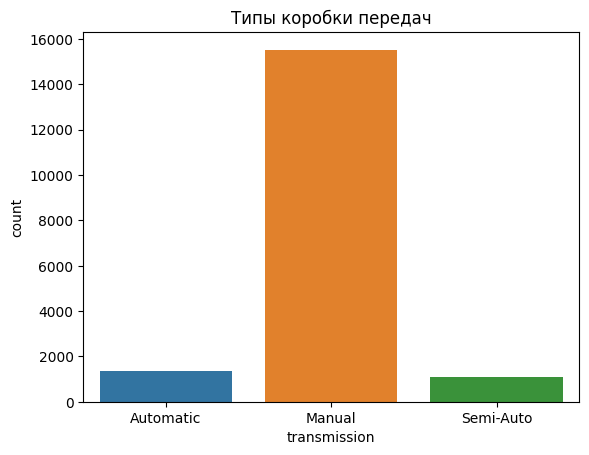

In [31]:
sns.countplot(x='transmission', data=df)
plt.title('Типы коробки передач')
plt.show()

# На основе данного графика можно сделать вывод, что значительно больше машин с механической коробкой передач

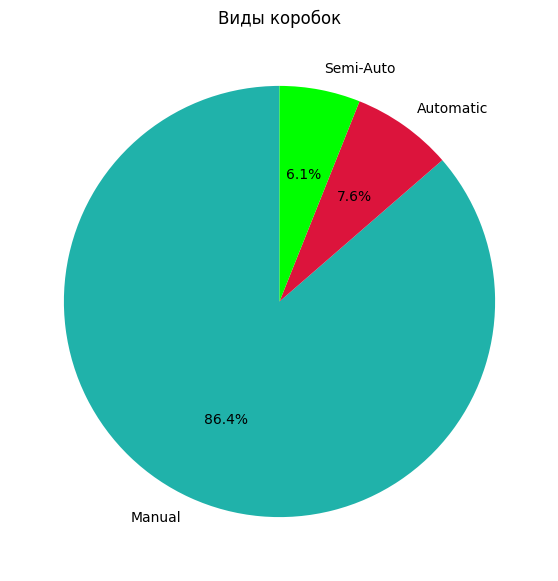

In [49]:
fig = plt.figure(figsize=(7,7))
colors = ("#20B2AA", "#DC143C", "#00FF00")
tags = df['transmission'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', colors = colors, startangle=90, label='')
plt.title('Виды коробок передач')
plt.show()

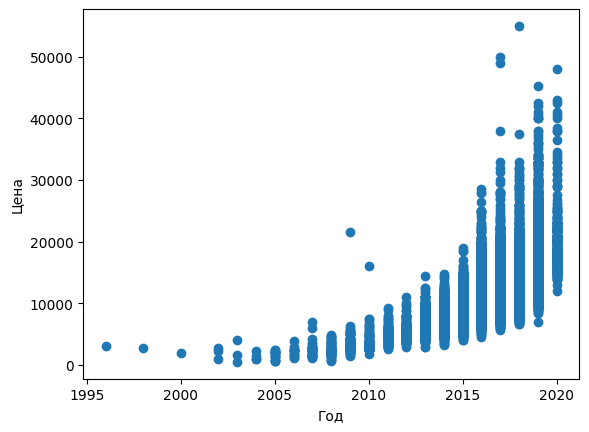

In [28]:
plt.scatter(df['year'], df['price'])
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

# На основе данного графика можно сделать вывод, что чем новее машина - тем она дороже

<Axes: xlabel='transmission', ylabel='price'>

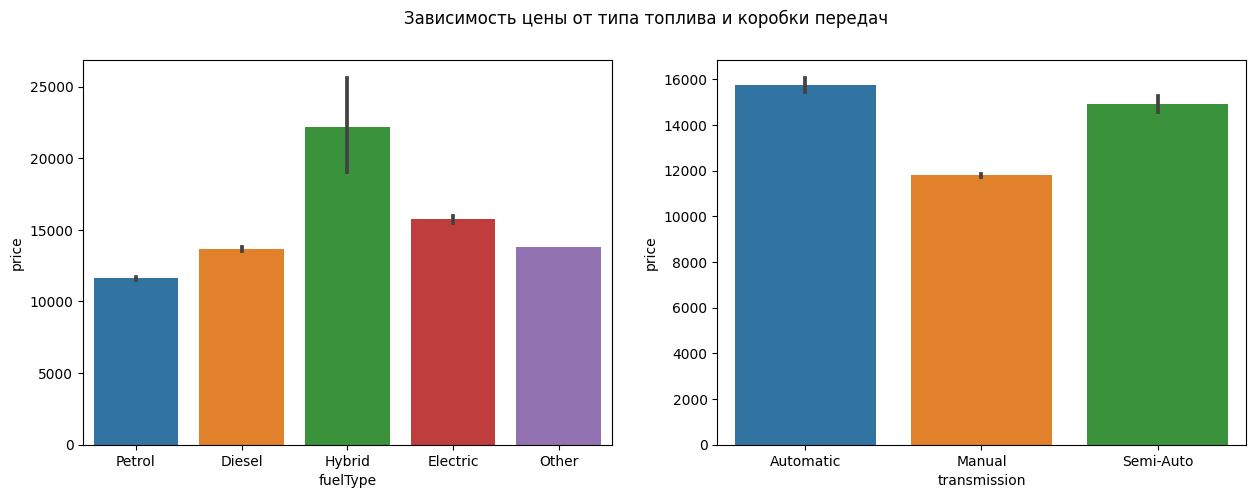

In [43]:
fueltype = df['fuelType']
transmission = df['transmission']
price = df['price']

fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Зависимость цены от типа топлива и коробки передач')
sns.barplot(x=fueltype, y=price, ax = axes[0])
sns.barplot(x=transmission, y=price, ax=axes[1])

# На основе данной визуализации можно сделать вывод, что дорогие машины гибридные и на коробке автоматической

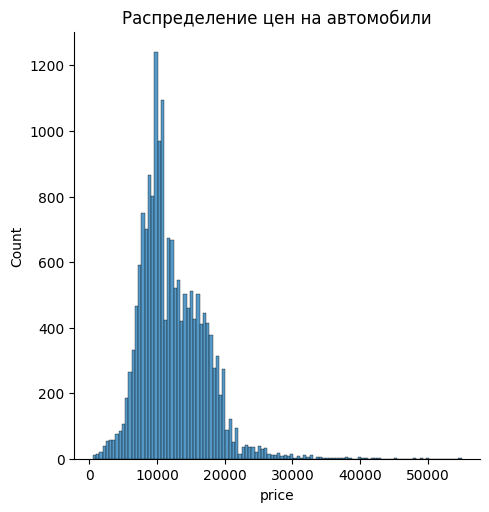

In [46]:
sns.displot(df.price)
plt.title('Распределение цен на автомобили')
plt.show()

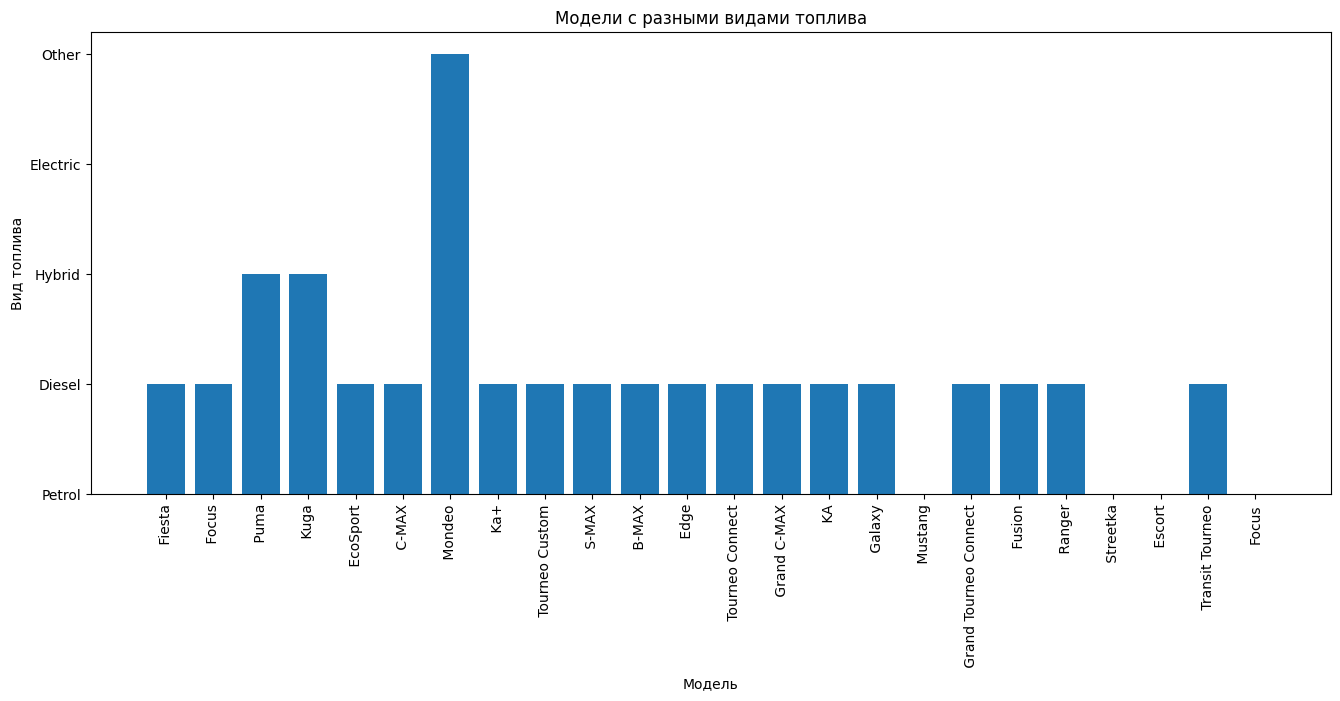

In [56]:
plt.figure(figsize=(16,6))
plt.bar(df['model'], df['fuelType'])
plt.title('Модели с разными видами топлива')
plt.xlabel("Модель")
plt.ylabel("Вид топлива")
plt.xticks(rotation=90)
plt.show()

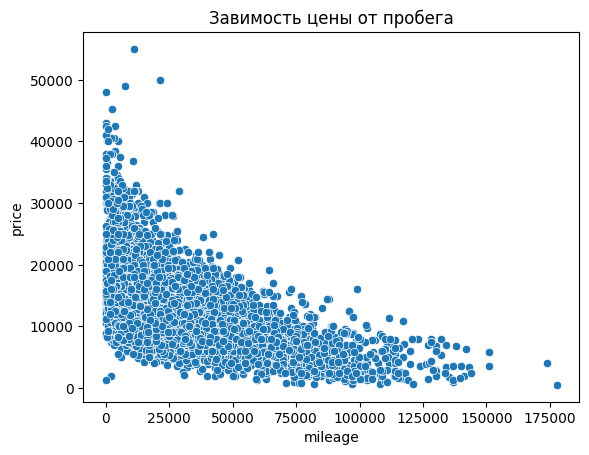

In [58]:
sns.scatterplot(x=df['mileage'],y=df['price'])
plt.title('Завимость цены от пробега')
plt.show()

# Из визуализации видно, что дороже машины у которых пробег меньше

## **Задание 4**

In [59]:
df.corr()

<ipython-input-59-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.645465,-0.718668,0.300518,-0.021488,-0.139170
price,0.645465,1.000000,-0.530610,0.406999,-0.346557,0.411203
mileage,-0.718668,-0.530610,1.000000,-0.260619,0.120225,0.215040
tax,0.300518,0.406999,-0.260619,1.000000,-0.502919,0.184365
mpg,-0.021488,-0.346557,0.120225,-0.502919,1.000000,-0.260528
engineSize,-0.139170,0.411203,0.215040,0.184365,-0.260528,1.000000


1) Между годом выпуска ("year") и ценой ("price") корреляция составляет 0.645465. Это говорит о том, что цена автомобиля склонна увеличиваться с увеличением года выпуска.

2) Между пробегом ("mileage") и ценой корреляция составляет -0.530610. Это означает, что чем выше пробег автомобиля, тем ниже его цена.

3) Между налогом ("tax") и ценой корреляция составляет 0.406999. Это говорит о том, что налог на автомобиль может влиять на его цену, но корреляция не очень сильная.

4) Между расходом топлива ("mpg") и ценой корреляция составляет -0.346557. Это указывает на то, что автомобили с более высоким расходом топлива чаще всего дешевле.

5) Между размером двигателя ("engineSize") и ценой корреляция составляет 0.411203. Это говорит о том, что автомобили с более крупными двигателями чаще всего более дорогие.

## **Задание 5**


In [64]:
ydata_profiling.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

### Благодаря pandas_profiling я посмотрела более подробный обзор на датасет. По данным, которые вывела эта библиотека я поняла все тоже самое. Увидела пропущенные значения, корреляционную матрицу, дубликаты и зависимости в виде визуализаций. Это оказалось очень удобным.

## **Задание 6**

### Дополнительные визуализации, которые можно было бы еще построить:
1. Зависимость цены от типа топлива
2. Сравнение налогов и расхода топлива
3. Зависимость цены от объема двигателя
4. Анализ расхода топлива

### Вопросы, которые можно задать:
1. Какие модели автомобилей наиболее популярны в этом наборе данных?
2. Как меняется цена с годом выпуска?
3. Есть ли зависимость между ценой и пробегом?
4. Как налог на автомобиль связан с другими характеристиками?

### Вопросы для бизнес-заказчика:
1. Какие модели автомобилей продаются лучше всего, и какие имеют наилучшую цену?
2. Какие факторы влияют на цену и спрос на автомобили?
3. Как можно оптимизировать ассортимент и ценообразование для максимизации прибыли?

### Дополнительные данные:
1. Данные о предыдущих владельцах
2. История автомобилей (ДТП)
3. Информация о скидках и акциях

### Обобщение:
Мы рассмотрели различные визуализации и анализы, которые можно провести с данным набором данных. И за счет этого сделали определенные вывод по данным, которые были представлены. Например: цена автомобиля очень сильно зависит от года выпуска, а также зависит от пробега автомобиля.



